<a href="https://colab.research.google.com/github/moh495/Classification/blob/master/TITANIC_%2C_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#importing Pandas and Numpy and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [53]:
!ls

sample_data  test.csv  train.csv


In [54]:
df = pd.read_csv('train.csv')
himi = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
df.info()
print('-'*50)
himi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [65]:
df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Robbins, Mr. Victor",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


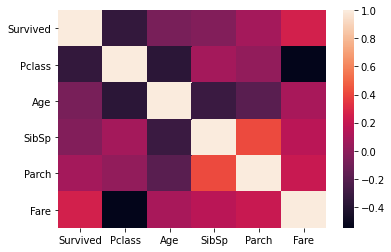

In [24]:
corr_mat = df.corr()
survived_corr = corr_mat['Survived']
top_corr_features = survived_corr[survived_corr.abs() > 0.02].index

sns.heatmap(corr_mat.loc[top_corr_features, top_corr_features])

In [23]:
survived_corr[survived_corr.abs() > 0.02].sort_values(ascending= False )

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

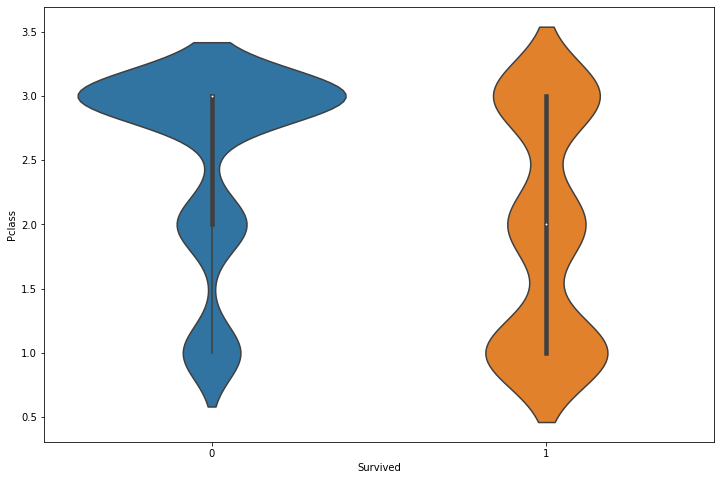

In [32]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.violinplot(x = 'Survived' , y='Pclass' , data=df , alpha = 0.02)

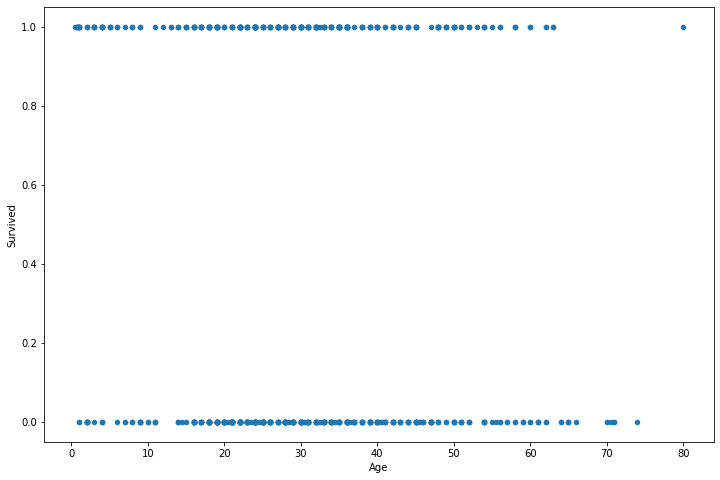

In [48]:
df.plot.scatter(x ='Age', y ='Survived')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


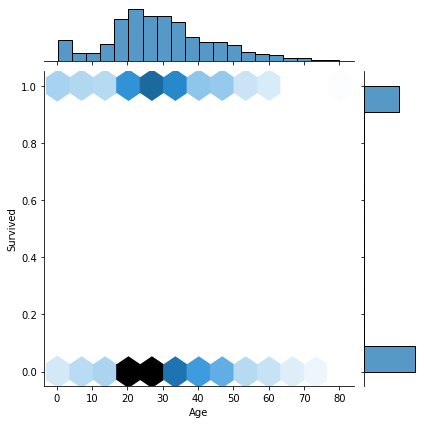

In [50]:
sns.jointplot(df.Age, df.Survived , kind='hex')

In [80]:
pd.concat([cat_variables, df[['Survived']]]).corr()

,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon",...,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Survived
"Name_Abbing, Mr. Anthony",1.000000,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,...,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001948,-0.001124,-0.001590,-0.001124,-0.001590,-0.001590,-0.001124,-0.001590,-0.001124,-0.001124,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001590,-0.001948,-0.001948,-0.001124,-0.001590,-0.002251,-0.001124,-0.016158,-0.010310,0.020759,NaN
"Name_Abbott, Mr. Rossmore Edward",-0.001124,1.000000,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,...,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001948,-0.001124,-0.001590,-0.001124,-0.001590,-0.001590,-0.001124,-0.001590,-0.001124,-0.001124,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001590,-0.001124,-0.001124,-0.001590,-0.001948,-0.001948,-0.001124,-0.001590,-0.002251,-0.001124,-0.016158,-0.010310,0.020759,NaN
"Name_Abbott, Mrs. Stanton (Rosa Hunt)",-0.001124,-0.001124,1.000000,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.001124,-0.

In [74]:
cat_variables = pd.get_dummies(df.select_dtypes(include=['object']))
cat_variables.head()

,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William","Name_Alhomaki, Mr. Ilmari Rudolf","Name_Ali, Mr. Ahmed","Name_Ali, Mr. William","Name_Allen, Miss. Elisabeth Walton","Name_Allen, Mr. William Henry","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Allum, Mr. Owen George","Name_Andersen-Jensen, Miss. Carla Christine Nielsine","Name_Anderson, Mr. Harry","Name_Andersson, Master. Sigvard Harald Elias","Name_Andersson, Miss. Ebba Iris Alfrida","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Miss. Erna Alexandra","Name_Andersson, Miss. Ingeborg Constanzia","Name_Andersson, Miss. Sigrid Elisabeth","Name_Andersson, Mr. Anders Johan","Name_Andersson, Mr. August Edvard (""Wennerstrom"")","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)","Name_Andreasson, Mr. Paul Edvin","Name_Andrew, Mr. Edgardo Samuel","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Arnold-Franchi, Mr. Josef","Name_Arnold-Franchi, Mrs. Josef (Josefine Franchi)","Name_Artagaveytia, Mr. Ramon",...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
